In [1]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.18.1'

In [2]:
%matplotlib inline

Brew By the Numbers - Add Up What’s in Your Beer
ZYMURGY Summer 1995

    Corrected SG = density of wort at T / density of water at T

                 =   density of wort at T     density of water at 60F
                   ------------------------ x -----------------------
                   density of water at 60 F    density of water at T

                 = (Measured SG at T) (SG correction factor)

This correction factor is solely a function of the density of water at
various temperatures, which is well-known. I made a curve fit to some data from
a couple of sources (De Clerck, Weast) that yielded the SG correction factor as
a function of measuring temperature (T in Fahrenheit):

    SG correction factor = 1.00130346 – 1.34722124 x 10-4 T + 2.04052596 x 10-6 T2 – 2.32820948 x 10-9 T3

This equation is accurate over the entire region from 32 degrees F to 212
degrees F.

In [23]:
# Original Coefficients
orig = [ -2.32820948e-9, 2.04052596e-6, -1.34722124e-4, 1.00130346]

The data below was obtained using the "Handbook of Chemistry and Physics (CRC)"
and is valid for a temperature range between 0 and 212F.
    
        Temp (C)  Temp (F)  Density  Correction relative to 59F
        -------   --------  -------  --------------------------
        0          32      0.99987      -0.74
        3.98       39.16   1.00000      -0.87
        5          41      0.99999      -0.86
        10         50      0.99973      -0.6
        15         59      0.99913      0
        18         64.4    0.99862      0.51
        20         68      0.99823      0.9
        25         77      0.99707      2.06
        30         86      0.99567      3.46
        35         95      0.99406      5.07
        38         100.4   0.99299      6.14
        40         104     0.99224      6.89
        45         113     0.99025      8.88
        50         122     0.98807      11.06
        55         131     0.98573      13.4
        60         140     0.98324      15.89
        65         149     0.98059      18.54
        70         158     0.97781      21.32
        75         167     0.97489      24.24
        80         176     0.97183      27.3
        85         185     0.96865      30.48
        90         194     0.96534      33.79
        95         203     0.96192      37.21
        100        212     0.95838      40.75

In [24]:
data=pd.read_csv("temp_density.csv", header=None)
data.head()

,0,1,2,3
0,0.00,32.00,0.99987,-0.74
1,3.98,39.16,1.00000,-0.87
2,5.00,41.00,0.99999,-0.86
3,10.00,50.00,0.99973,-0.60
4,15.00,59.00,0.99913,0.00


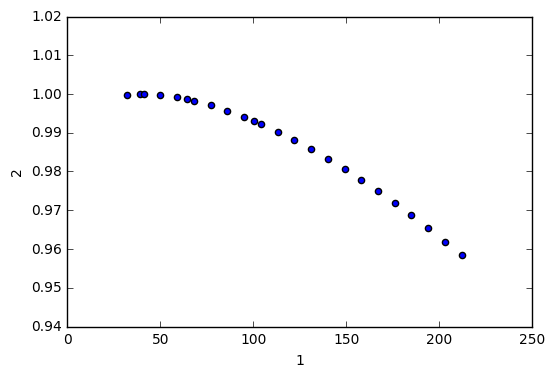

In [25]:
df = pd.DataFrame(data)
df.plot.scatter(x=1, y=2)

In [26]:
def graph(xdata, xlim, ydata, ylim, qout):
    xp = np.linspace(*xlim, num=1500)
    fn = np.poly1d(qout)
    print(fn)
    pxp = fn(xp)

    plt.plot(xdata, ydata, '.', xp, pxp, '-')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel('x')
    plt.ylabel('y', rotation='horizontal')
    plt.grid(True)
    plt.show()

In [27]:
xdata = df[1]
ydata = df[2]

qout = np.polyfit(xdata, ydata, 3)
print(np.poly1d(qout))

           3             2
2.628e-09 x - 2.058e-06 x + 0.0001327 x + 0.9978


In [28]:
print("Polynomial Fit Coefficients")
print("Calculated vs Original")
print("C4 = {: 0.6e} vs {: 0.6e}".format(qout[0], orig[0]))
print("C3 = {: 0.6e} vs {: 0.6e}".format(qout[1], orig[1]))
print("C2 = {: 0.6f}     vs {: 0.6f}".format(qout[2], orig[2]))
print("C1 = {: 0.6f}     vs {: 0.6f}".format(qout[3], orig[3]))
print("")
print("Polynomial Fit Coefficients (with Significant Digits)")
print("Calculated vs Original")
print("C4 = {: 0.4e} vs {: 0.4e}".format(qout[0], orig[0]))
print("C3 = {: 0.4e} vs {: 0.4e}".format(qout[1], orig[1]))
print("C2 = {: 0.4f}     vs {: 0.4f}".format(qout[2], orig[2]))
print("C1 = {: 0.4f}     vs {: 0.4f}".format(qout[3], orig[3]))
print("")
print("The coefficients are seen to be identical with Sig Figs")

Polynomial Fit Coefficients
Calculated vs Original
C4 =  2.627657e-09 vs -2.328209e-09
C3 = -2.057802e-06 vs  2.040526e-06
C2 =  0.000133     vs -0.000135
C1 =  0.997816     vs  1.001303

Polynomial Fit Coefficients (with Significant Digits)
Calculated vs Original
C4 =  2.6277e-09 vs -2.3282e-09
C3 = -2.0578e-06 vs  2.0405e-06
C2 =  0.0001     vs -0.0001
C1 =  0.9978     vs  1.0013

The coefficients are seen to be identical with Sig Figs


           3             2
2.628e-09 x - 2.058e-06 x + 0.0001327 x + 0.9978


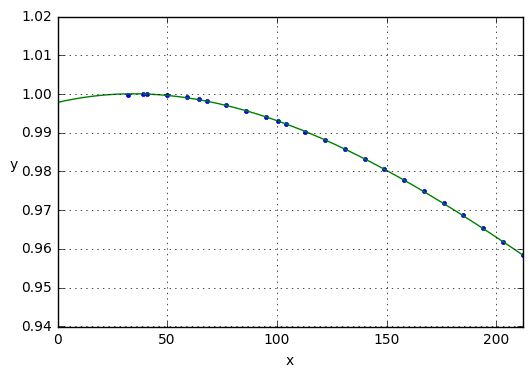

In [29]:
graph(xdata, [0, 212], ydata, [0.94, 1.02], qout)

            3             2
-2.328e-09 x + 2.041e-06 x - 0.0001347 x + 1.001


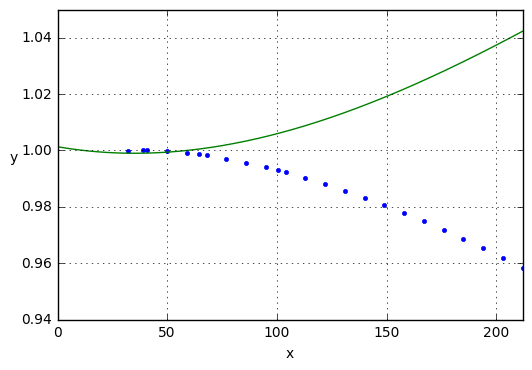

In [34]:
graph(xdata, [0, 212], ydata, [0.94, 1.05], np.poly1d(orig))

In [87]:
fn = np.poly1d(qout)
print("Data Fit to Polynomial")
print(fn(xdata))

Data Fit to Polynomial
[ 1.00004103  1.00001422  0.99997813  0.99963423  0.99902082  0.99852818
  0.99814938  0.99703143  0.99567844  0.99410191  0.99305348  0.99231334
  0.99032421  0.98814603  0.98579028  0.98326846  0.98059206  0.97777258
  0.97482151  0.97175034  0.96857056  0.96529367  0.96193117  0.95849454]


In [88]:
print("Difference between Polynomial and Original")
print(fn(xdata) - df[2])

Difference between Polynomial and Original
0     0.000171
1     0.000014
2    -0.000012
3    -0.000096
4    -0.000109
5    -0.000092
6    -0.000081
7    -0.000039
8     0.000008
9     0.000042
10    0.000063
11    0.000073
12    0.000074
13    0.000076
14    0.000060
15    0.000028
16    0.000002
17   -0.000037
18   -0.000068
19   -0.000080
20   -0.000079
21   -0.000046
22    0.000011
23    0.000115
Name: 2, dtype: float64
